In [ ]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [ ]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [ ]:
import os
import zipfile

# Tentukan dataset Kaggle dan tujuan
dataset_name = "masoudnickparvar/brain-tumor-mri-dataset"
output_dir = "/content/brain_tumor_dataset"

# Unduh dataset
!kaggle datasets download -d {dataset_name} -p /content

# Ekstrak file ZIP ke folder tujuan
zip_file = "/content/brain-tumor-mri-dataset.zip"
if os.path.exists(zip_file):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(output_dir)
    print(f"Dataset berhasil diekstrak ke: {output_dir}")
    # Hapus file ZIP untuk menghemat ruang
    os.remove(zip_file)
else:
    print("File ZIP tidak ditemukan!")


Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 98% 146M/149M [00:04<00:00, 44.7MB/s]
100% 149M/149M [00:04<00:00, 37.4MB/s]
Dataset berhasil diekstrak ke: /content/brain_tumor_dataset


In [ ]:
tr_df = train_df('/content/brain_tumor_dataset/Training')

In [ ]:
tr_df

,Class Path,Class
0,/content/brain_tumor_dataset/Training/meningio...,meningioma
1,/content/brain_tumor_dataset/Training/meningio...,meningioma
2,/content/brain_tumor_dataset/Training/meningio...,meningioma
3,/content/brain_tumor_dataset/Training/meningio...,meningioma
4,/content/brain_tumor_dataset/Training/meningio...,meningioma
...,...,...
5707,/content/brain_tumor_dataset/Training/pituitar...,pituitary
5708,/content/brain_tumor_dataset/Training/pituitar...,pituitary
5709,/content/brain_tumor_dataset/Training/pituitar...,pituitary
5710,/content/brain_tumor_dataset/Training/pituitar...,pituitary


In [ ]:
ts_df = test_df('/content/brain_tumor_dataset/Testing')

In [ ]:
ts_df

,Class Path,Class
0,/content/brain_tumor_dataset/Testing/meningiom...,meningioma
1,/content/brain_tumor_dataset/Testing/meningiom...,meningioma
2,/content/brain_tumor_dataset/Testing/meningiom...,meningioma
3,/content/brain_tumor_dataset/Testing/meningiom...,meningioma
4,/content/brain_tumor_dataset/Testing/meningiom...,meningioma
...,...,...
1306,/content/brain_tumor_dataset/Testing/pituitary...,pituitary
1307,/content/brain_tumor_dataset/Testing/pituitary...,pituitary
1308,/content/brain_tumor_dataset/Testing/pituitary...,pituitary
1309,/content/brain_tumor_dataset/Testing/pituitary...,pituitary


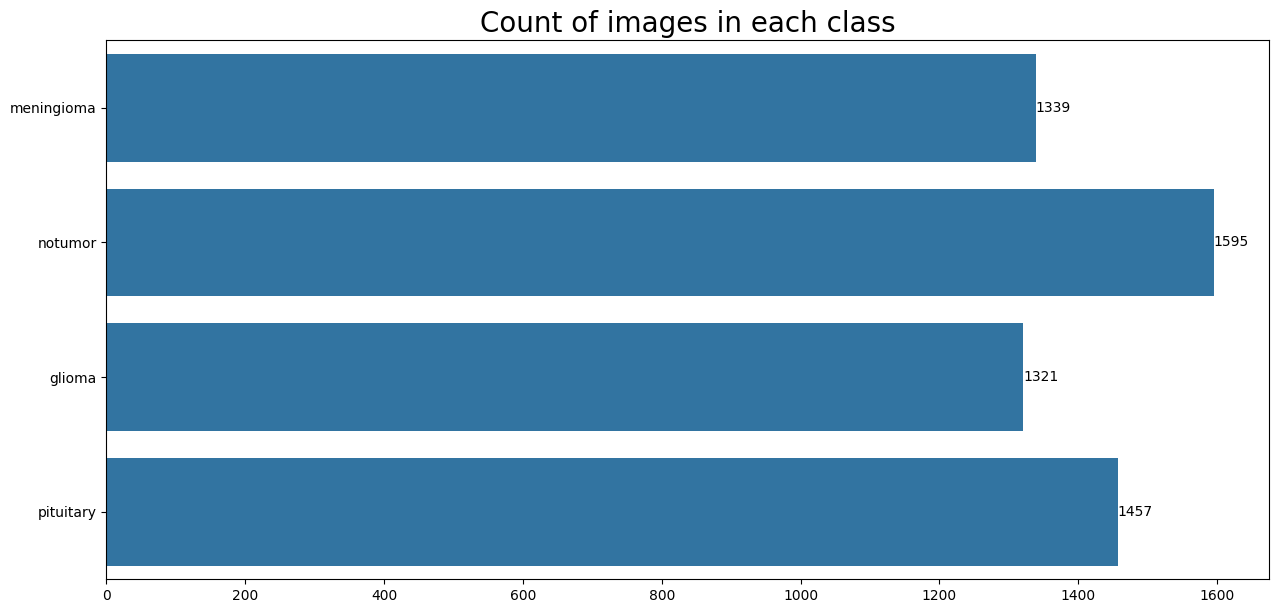

In [ ]:
# Count of images in each class in train data
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

<ipython-input-19-e4c632d83a19>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=ts_df['Class'], palette='viridis')


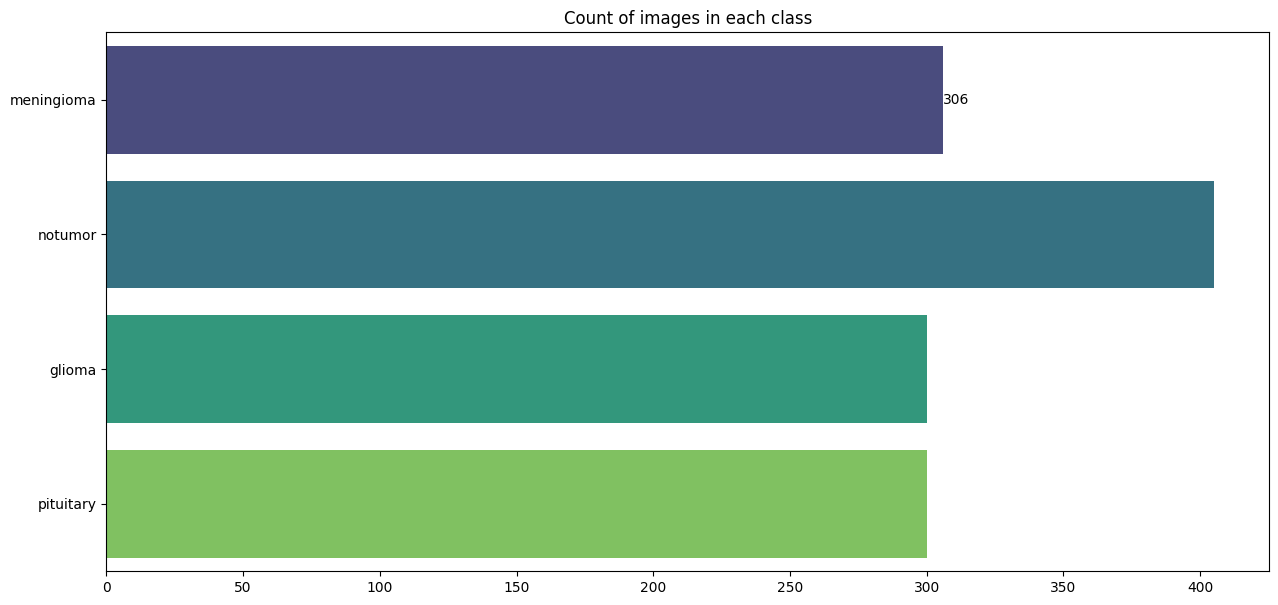

In [ ]:
#Count each class in test data
plt.figure(figsize=(15, 7))
ax = sns.countplot(y=ts_df['Class'], palette='viridis')

ax.set(xlabel='', ylabel='', title='Count of images in each class')
ax.bar_label(ax.containers[0])

plt.show()

In [ ]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])

In [ ]:
valid_df

,Class Path,Class
997,/content/brain_tumor_dataset/Testing/glioma/Te...,glioma
18,/content/brain_tumor_dataset/Testing/meningiom...,meningioma
1072,/content/brain_tumor_dataset/Testing/pituitary...,pituitary
73,/content/brain_tumor_dataset/Testing/meningiom...,meningioma
820,/content/brain_tumor_dataset/Testing/glioma/Te...,glioma
...,...,...
770,/content/brain_tumor_dataset/Testing/glioma/Te...,glioma
560,/content/brain_tumor_dataset/Testing/notumor/T...,notumor
984,/content/brain_tumor_dataset/Testing/glioma/Te...,glioma
194,/content/brain_tumor_dataset/Testing/meningiom...,meningioma


In [ ]:
batch_size = 32
img_size = (299, 299)

_gen = ImageDataGenerator(rescale=1/255,
                          brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size)

valid_gen = _gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=16,
                                  target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


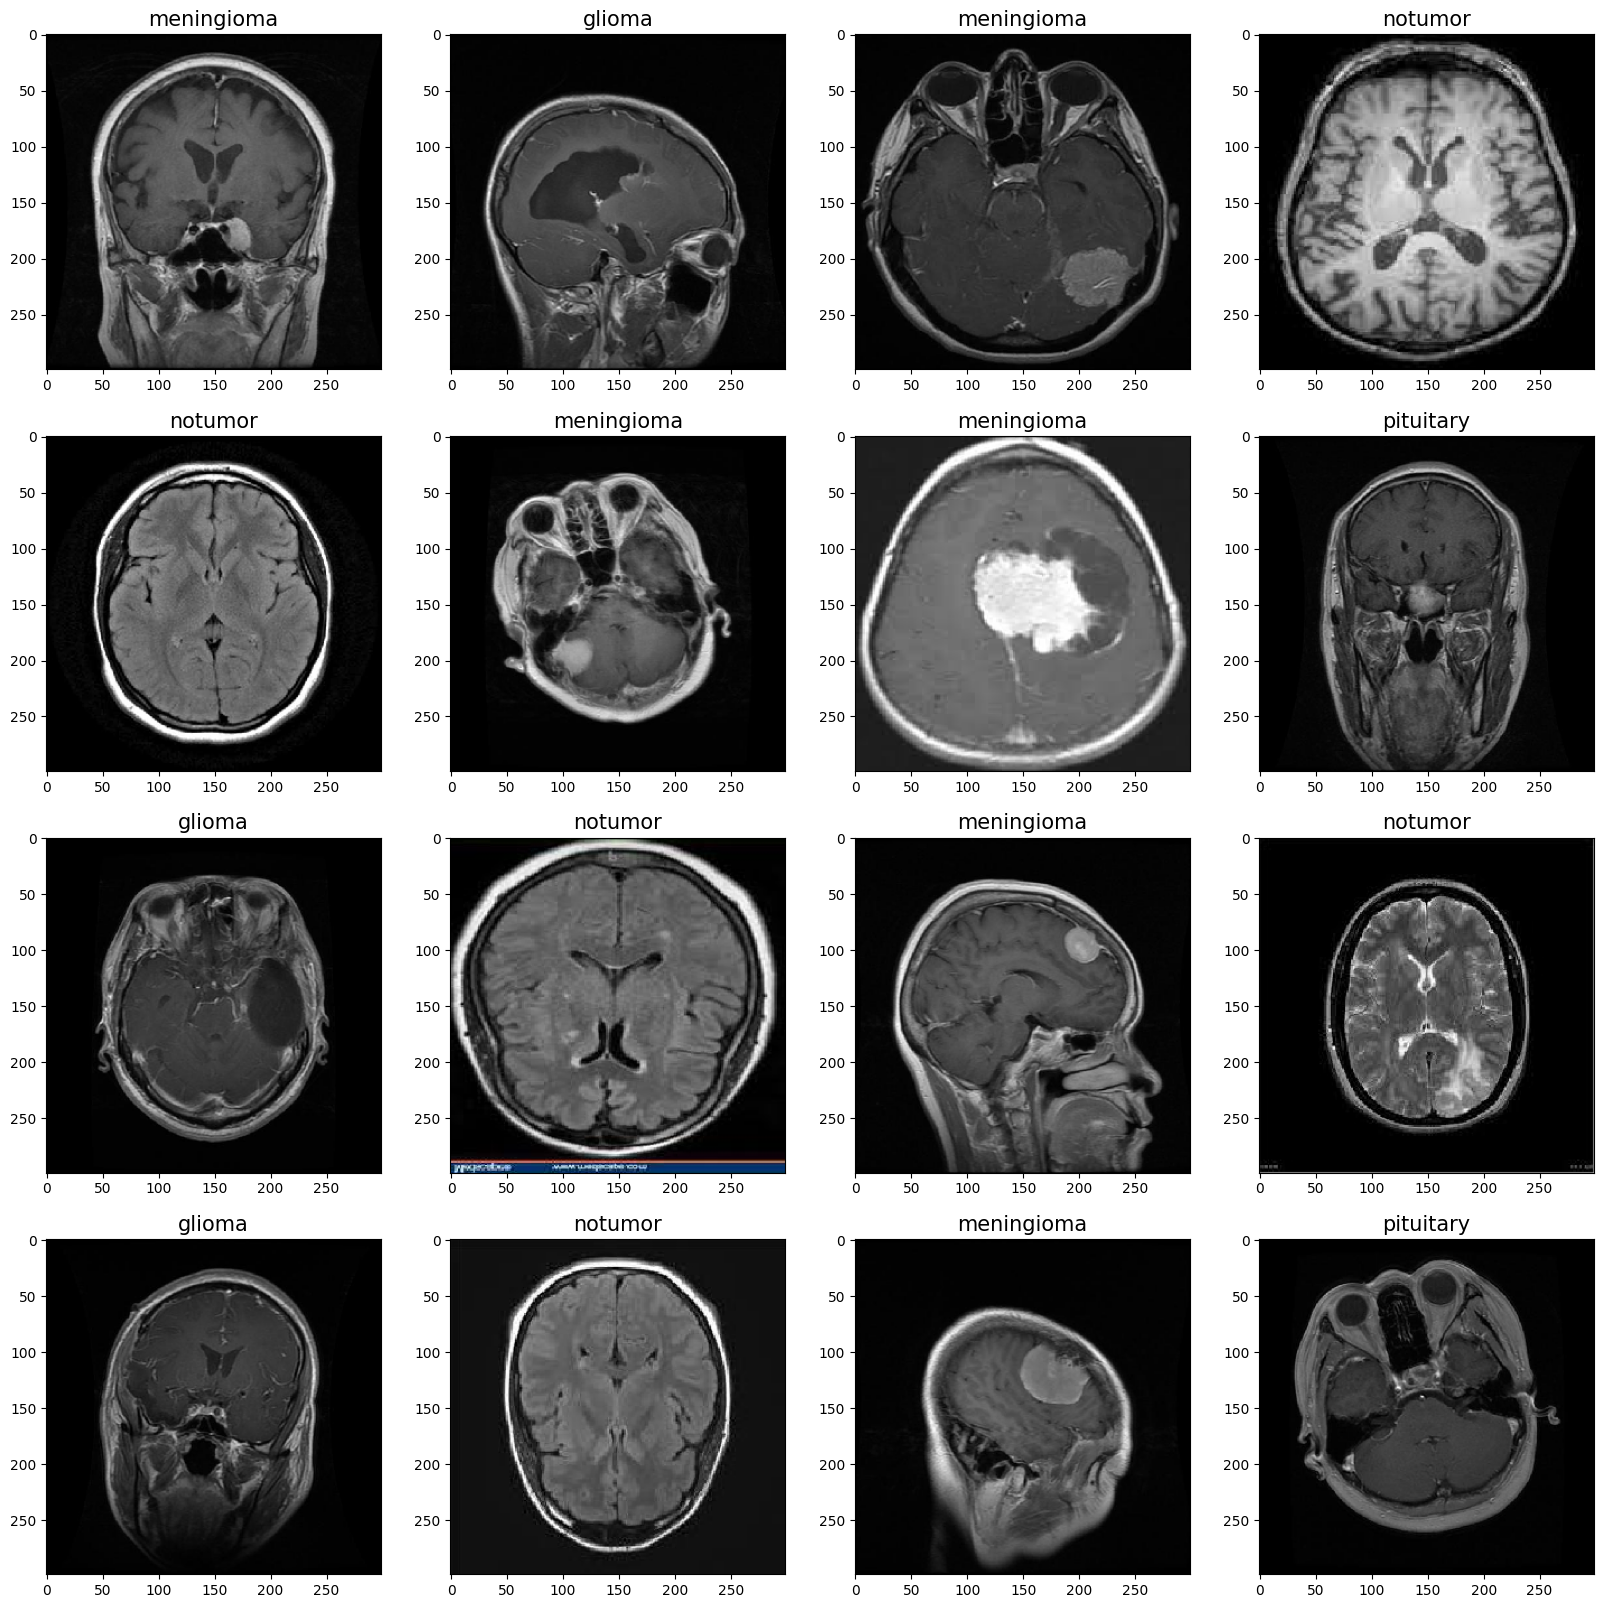

In [ ]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4,4, i + 1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)

plt.show()

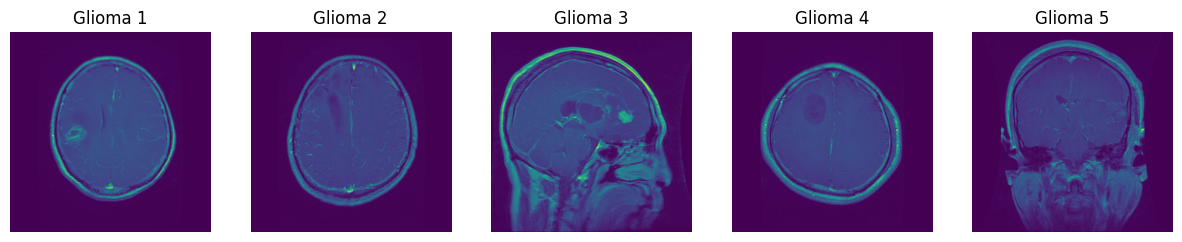

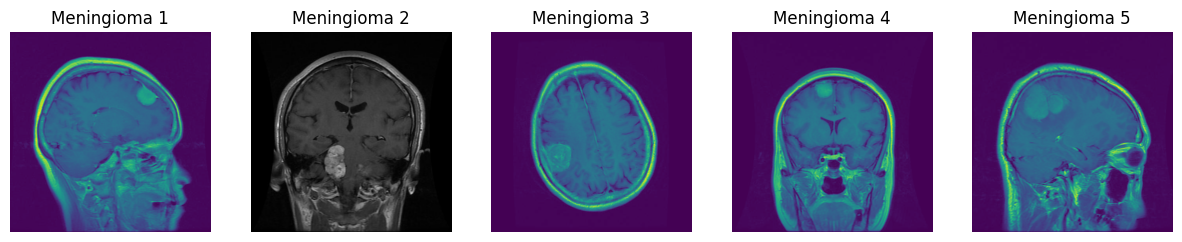

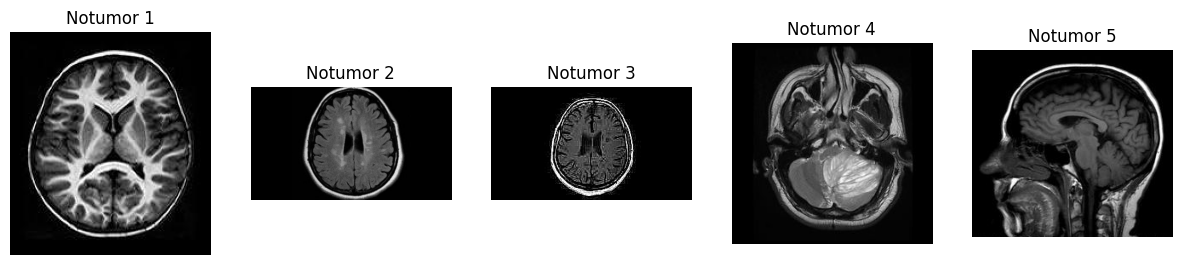

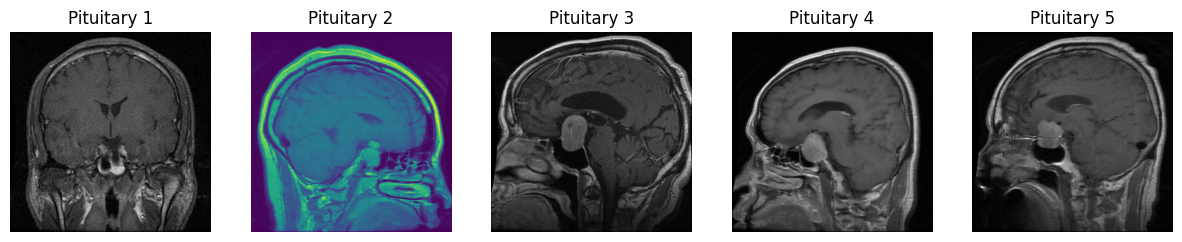

In [ ]:
# Path to dataset directories - moved to before the usage in display_samples
dirData = "/content/brain_tumor_dataset"
dirTrain = os.path.join(dirData, "/content/brain_tumor_dataset/Training")
dirTest = os.path.join(dirData, "/content/brain_tumor_dataset/Testing")

# Fungsi untuk menampilkan sampel gambar
def display_samples(image_path, title, n=5):
    image_files = [f for f in os.listdir(image_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    sample_files = random.sample(image_files, min(n, len(image_files)))
    plt.figure(figsize=(15, 5))
    for i, file in enumerate(sample_files):
        img = Image.open(os.path.join(image_path, file))
        plt.subplot(1, len(sample_files), i + 1)
        plt.imshow(img)
        plt.title(f"{title} {i + 1}")
        plt.axis("off")
    plt.show()

# Tampilkan sampel
categories = ["glioma", "meningioma", "notumor", "pituitary"]
for category in categories:
    display_samples(os.path.join(dirTrain, category), category.capitalize())

In [ ]:
img_shape=(299,299,3)
base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')

# for layer in base_model.layers:
#     layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(4, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 2048)                │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,124,268 (80.58 MB)

 Trainable params: 21,069,740 (80.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

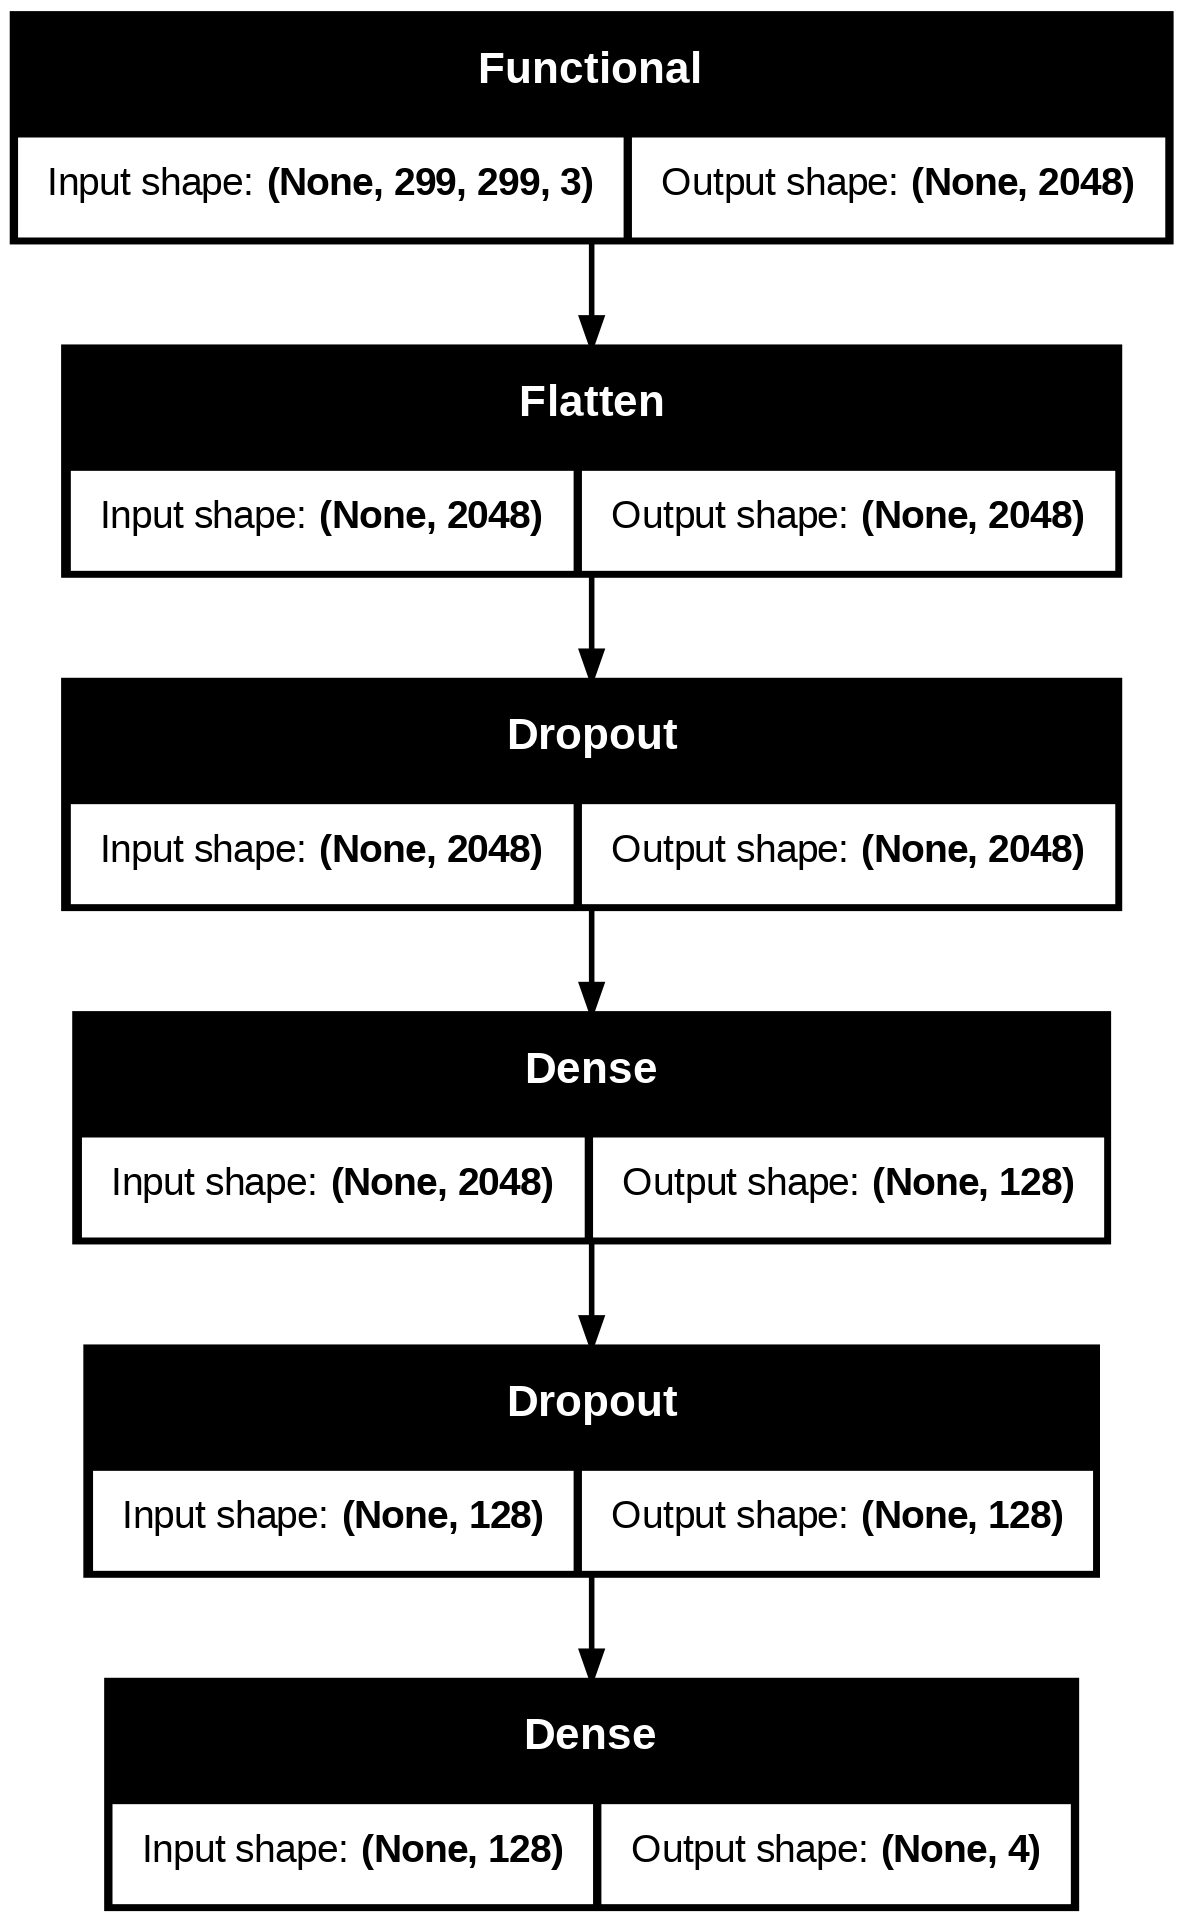

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
hist = model.fit(tr_gen,
                 epochs=10,
                 validation_data=valid_gen,
                 shuffle= False)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 272s 1s/step - accuracy: 0.8296 - loss: 0.5307 - precision: 0.8709 - recall: 0.7575 - val_accuracy: 0.8947 - val_loss: 0.2888 - val_precision: 0.8997 - val_recall: 0.8901
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 146s 814ms/step - accuracy: 0.9766 - loss: 0.0704 - precision: 0.9775 - recall: 0.9754 - val_accuracy: 0.9344 - val_loss: 0.1984 - val_precision: 0.9370 - val_recall: 0.9313
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 145s 810ms/step - accuracy: 0.9939 - loss: 0.0263 - precision: 0.9941 - recall: 0.9936 - val_accuracy: 0.9908 - val_loss: 0.0343 - val_precision: 0.9924 - val_recall: 0.9908
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 839ms/step - accuracy: 0.9973 - loss: 0.0103 - precision: 0.9973 - recall: 0.9972 - val_accuracy: 0.9832 - val_loss: 0.0402 - val_precision: 0.9832 - val_recall: 0.9832
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 145s 809ms/step - accuracy: 0.9922 - loss: 0.0239 - precision: 0.9932 - recall: 0.9922 - val_accuracy: 0.9863 - val_lo

In [ ]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])

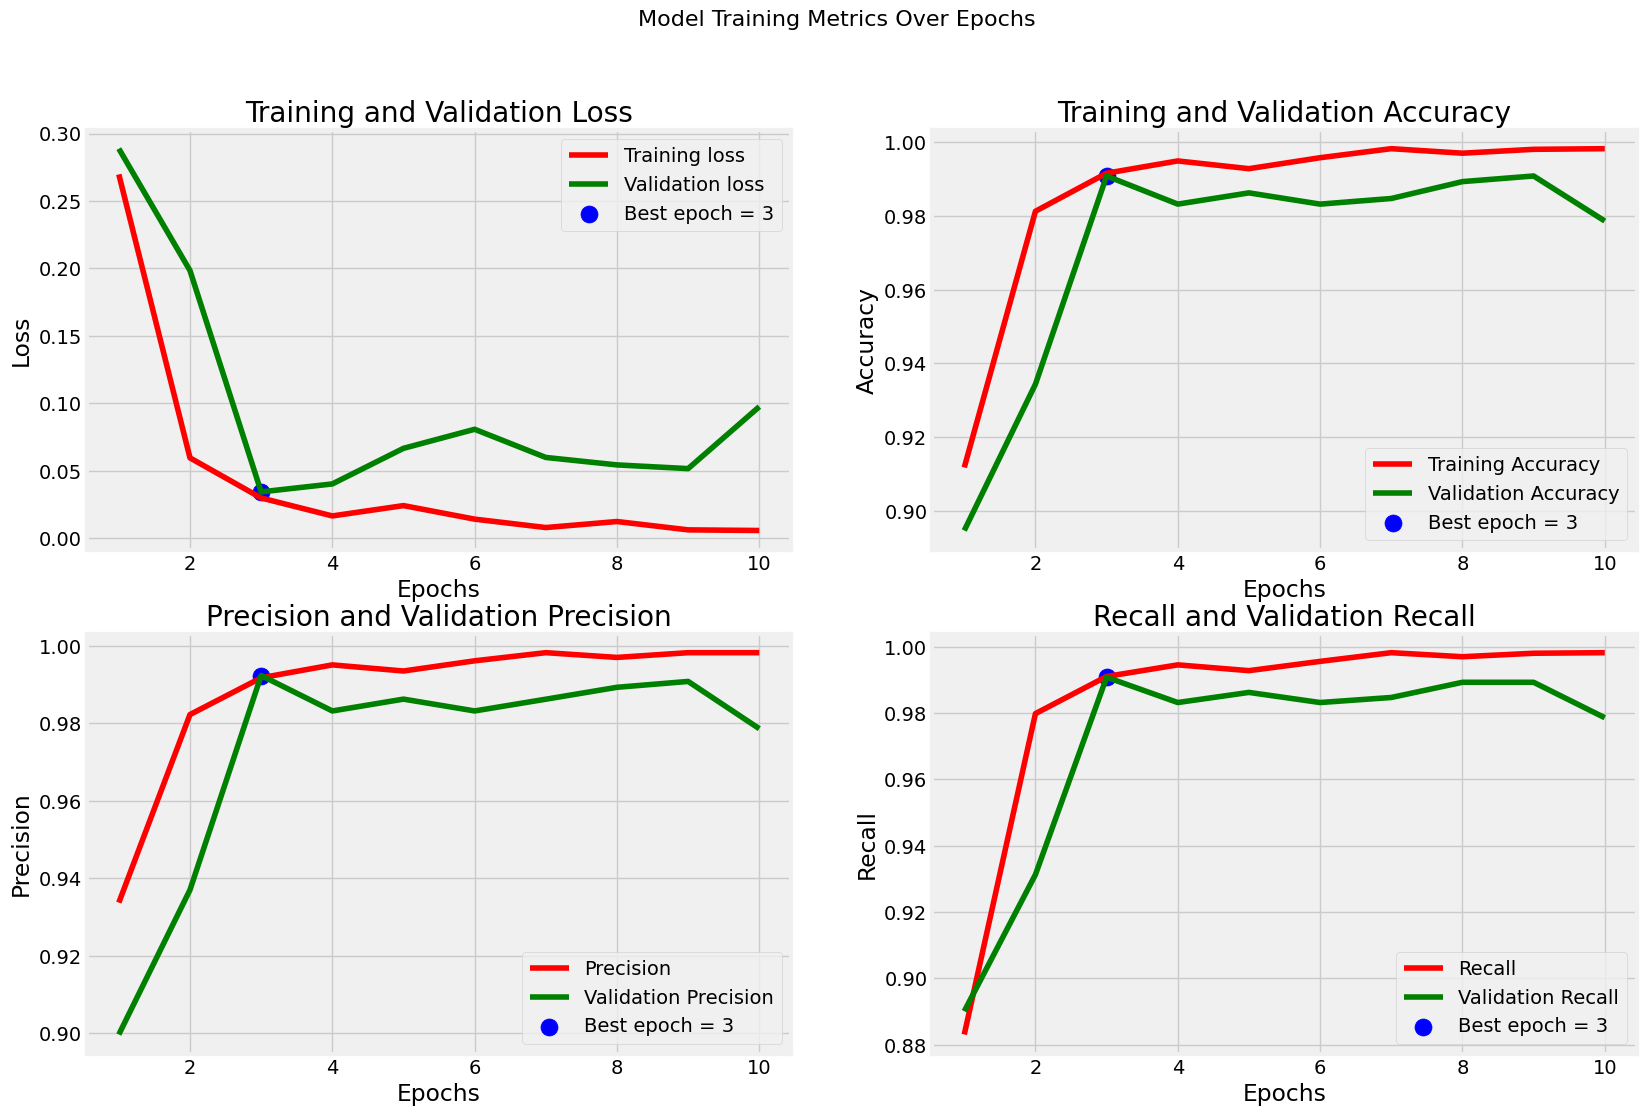

In [ ]:
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision']
tr_recall = hist.history['recall']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision']
val_recall = hist.history['val_recall']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

179/179 ━━━━━━━━━━━━━━━━━━━━ 44s 242ms/step - accuracy: 0.9977 - loss: 0.0069 - precision: 0.9977 - recall: 0.9977
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - accuracy: 0.9786 - loss: 0.0713 - precision: 0.9786 - recall: 0.9786
 1/41 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - accuracy: 1.0000 - loss: 2.5928e-06 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.9744 - loss: 0.0898 - precision: 0.9763 - recall: 0.9744
Train Loss: 0.0042
Train Accuracy: 99.86%
--------------------
Validation Loss: 0.0979
Validation Accuracy: 97.71%
--------------------
Test Loss: 0.1073
Test Accuracy: 97.56%


In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step


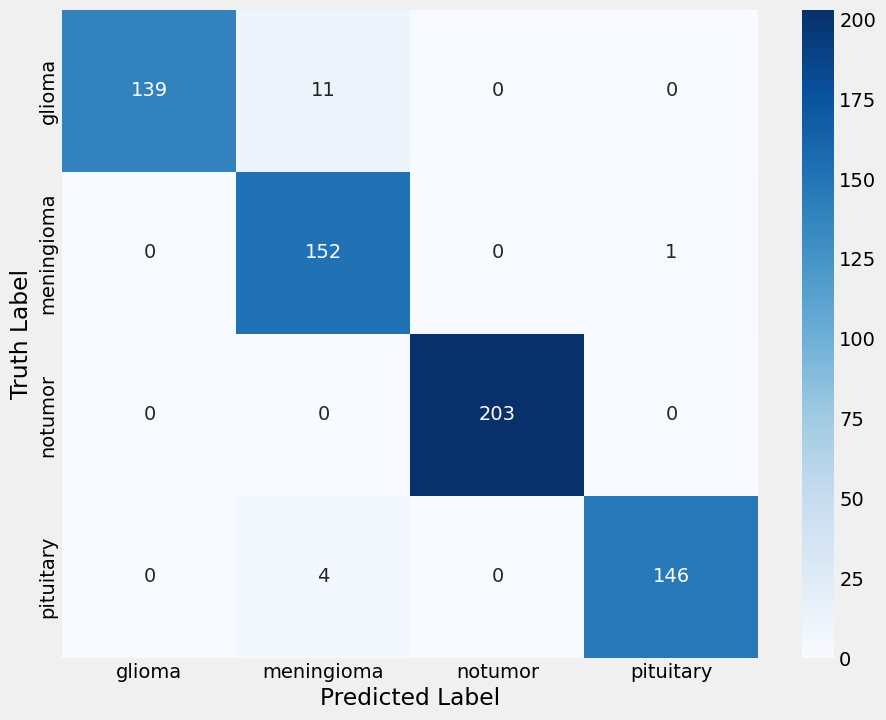

In [ ]:
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       150
           1       0.91      0.99      0.95       153
           2       1.00      1.00      1.00       203
           3       0.99      0.97      0.98       150

    accuracy                           0.98       656
   macro avg       0.98      0.97      0.97       656
weighted avg       0.98      0.98      0.98       656



In [ ]:
def predict(img_path):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = model.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


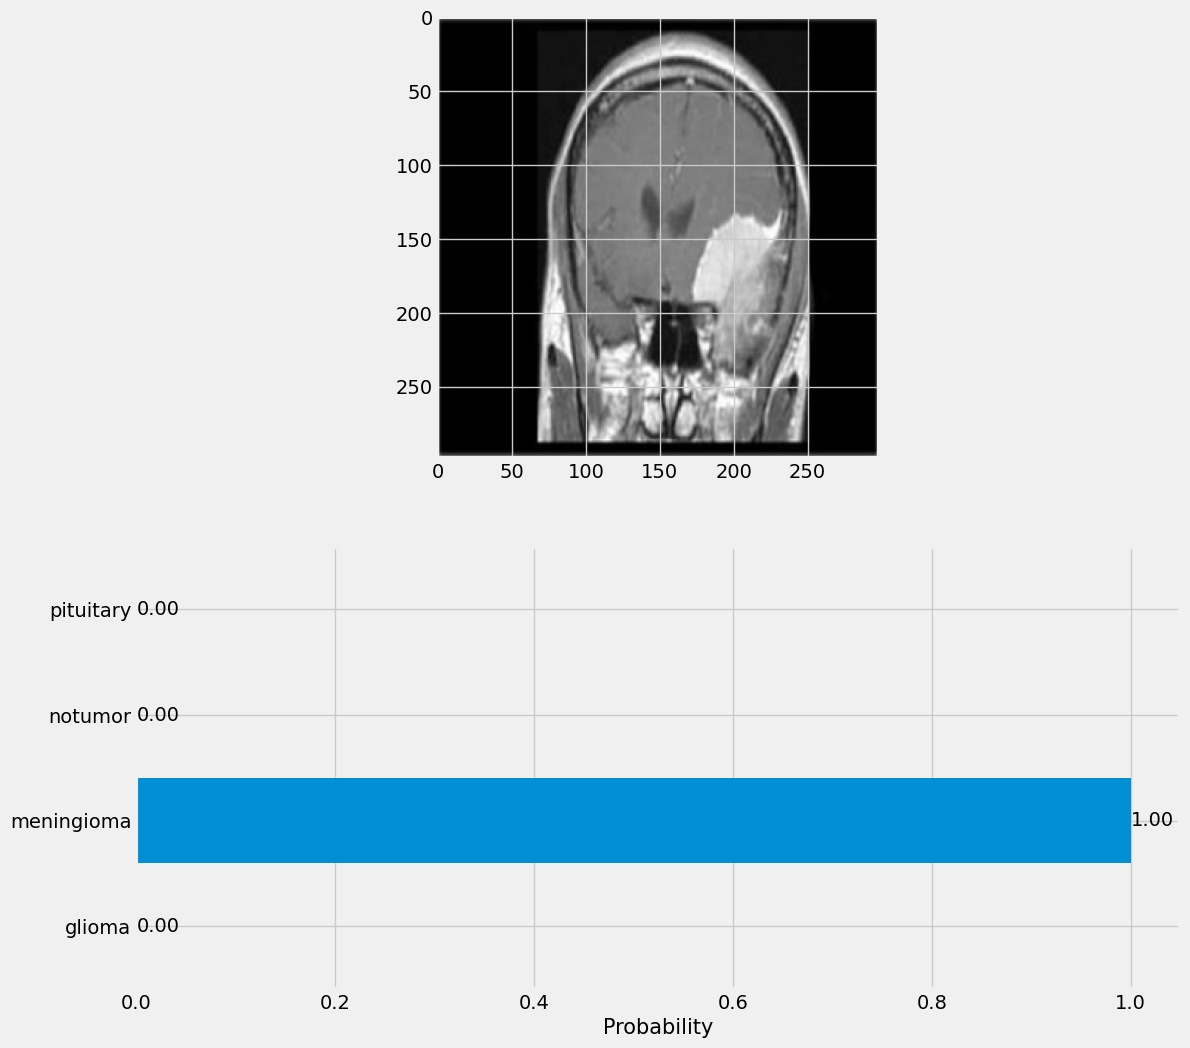

In [ ]:
predict('/content/brain_tumor_dataset/Testing/meningioma/Te-meTr_0000.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


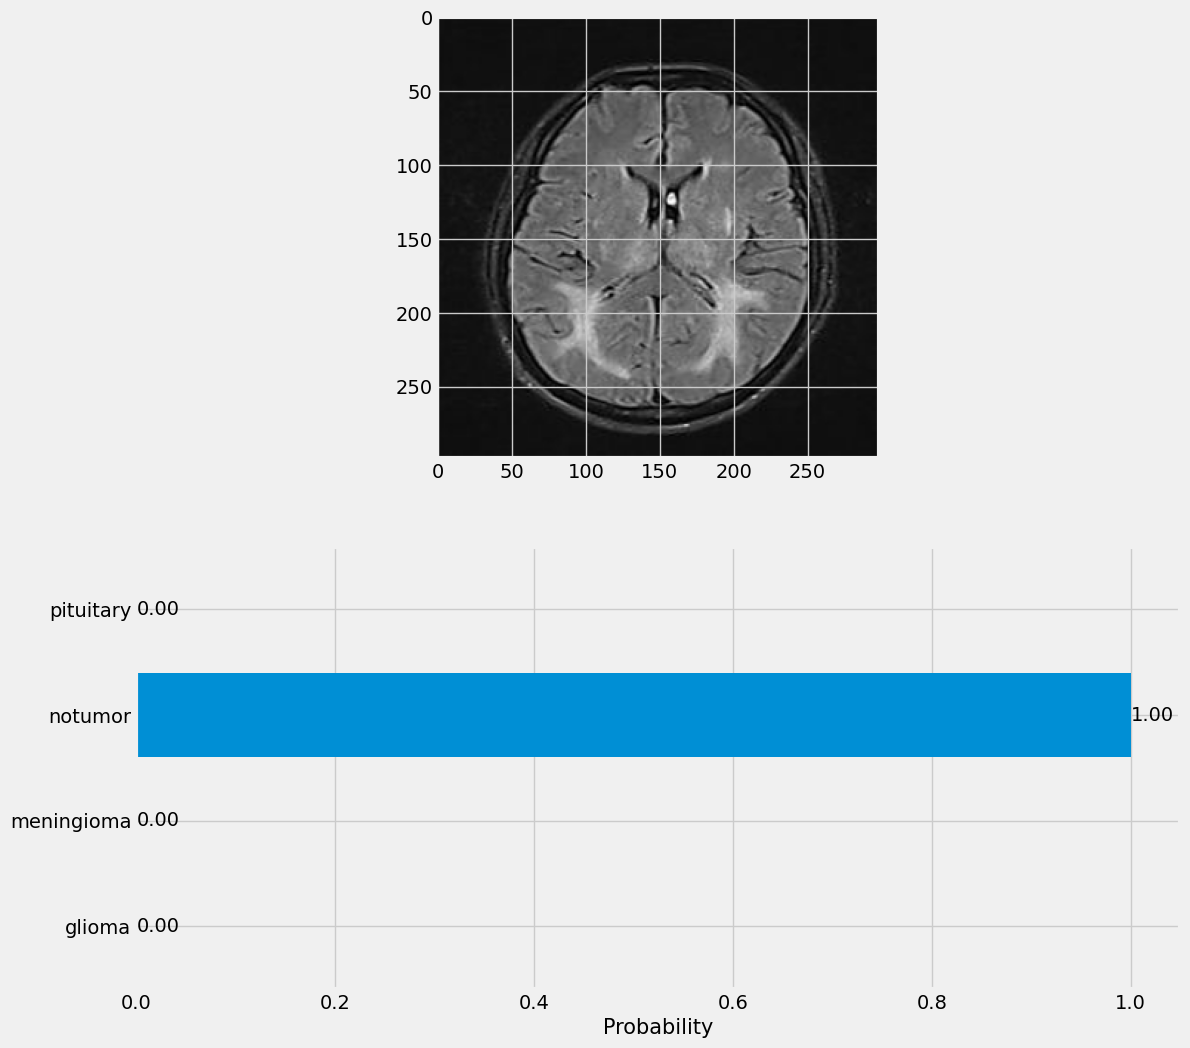

In [ ]:
predict('/content/brain_tumor_dataset/Testing/notumor/Te-noTr_0001.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


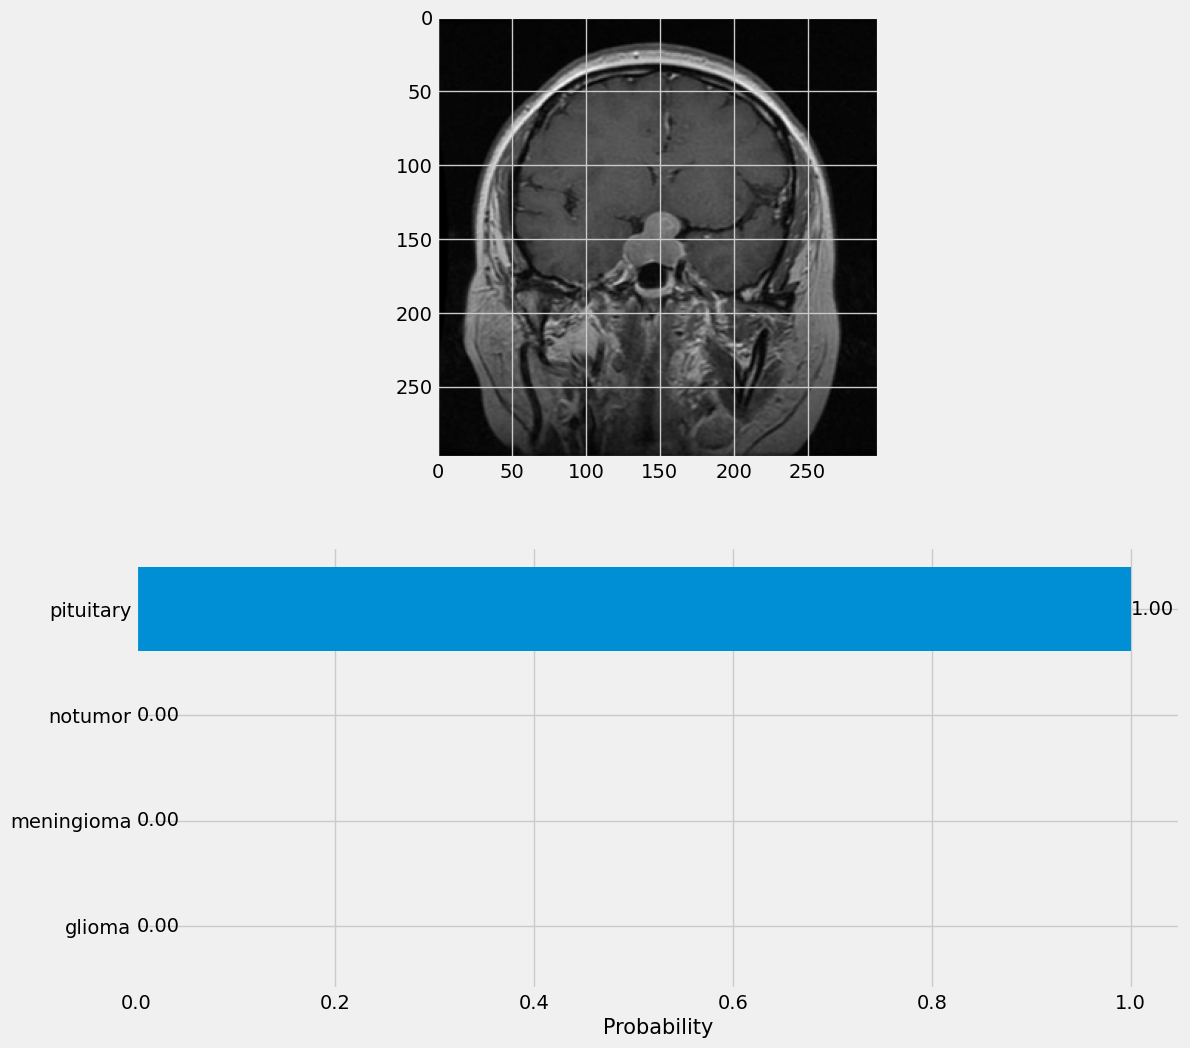

In [ ]:
predict('/content/brain_tumor_dataset/Testing/pituitary/Te-piTr_0001.jpg')